# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [22]:
# Your code here.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [4]:
student_data = pd.DataFrame({
    'Age': [17,51,27,21,36,48,19,26,54,30], 
    'Tardies': [10,1,5,9,4,2,9,6,0,3]
})
student_data.head(10)

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

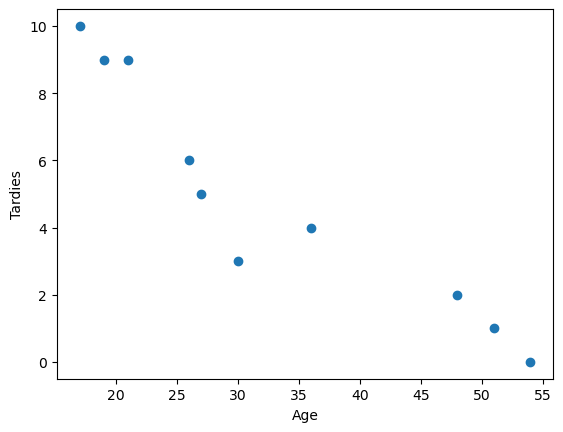

In [9]:
# Your code here.
f,ax = plt.subplots()
ax.scatter(student_data['Age'],student_data['Tardies'])
ax.set_xlabel('Age')
ax.set_ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
"""
Looking at the data scatter plot, we see that, the more you go to the right side (age increases), the lower
the values become. So there seems to be a linear relationship between the two. There are some outliers here,
but majority of data points seems to follow a downward trend
"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
# Your response here.
#correlation:
print('Correlation:' , student_data['Age'].corr(student_data['Tardies']))

#covariance:
print('Covariance:' , student_data['Age'].cov(student_data['Tardies']))

print("""\nLooking at Covariance, it is clear that Age and Tardies have a relationship that when Age increases
the Taridies decreases (the negative value). Looking at Correlation, we see that there is a strong relationship
between the two (value of 0.93), and the negative correlation confirms the conclusion we made using the 
covariance value.
""")

Correlation: -0.9391626886887122
Covariance: -45.56666666666666

Looking at Covariance, it is clear that Age and Tardies have a relationship that when Age increases
the Taridies decreases (the negative value). Looking at Correlation, we see that there is a strong relationship
between the two (value of 0.93), and the negative correlation confirms the conclusion we made using the 
covariance value.



Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [19]:
# Your response here.

# We see based on scatter chart, there seems to be a linear relationship between the two. So we are going to
# build a regression model, than given the value of the Age, we could predict the Tardies (outcome)
x = student_data[['Age']]
y = student_data['Tardies']
model = linear_model.LinearRegression()
result = model.fit(x,y)

Plot your regression model on your scatter plot.

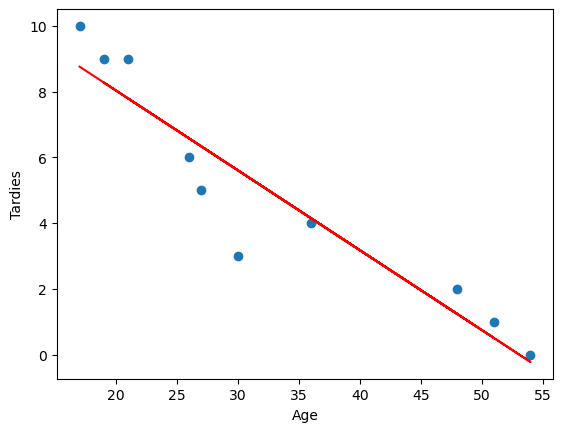

In [20]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x
f,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('Age')
ax.set_ylabel('Tardies')
ax.plot(x, regression_line, c='r')
plt.show()

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
"""
Looking at the plot above, and distance betwee data points, and predicted values we get on the regression line
it seems it is a good fit for the prediction, considering most data points are close to the line, except one
outlier. 

So the conclusion can be, that given the Age, we can predict Tardiness, and lower the age, the higher the 
Tardiness.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [21]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [25]:
# Your response here. 
data = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
data.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
"""
The Fuel Cost/Year seems to have strongest correlation with CO2 Emission.

The Year, seems to have weakest corrlation and the most irrelevant one. Also Fuel Cost/Year, which is somehow
related to Fuel Barrels/Year, is not as useful, since the cost will tie to economical situation, that will not
play a role in the CO2 Emission.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your response here. 
X = data[['Cylinders','Fuel Barrels/Year','Combined MPG']]
Y = data['CO2 Emission Grams/Mile']
model = linear_model.LinearRegression()
result = model.fit(X,Y)
result.score(X,Y)

0.9782450916239828

In [ ]:
"""
We used Linear Regression, based on the columns with highest correlation with CO2 Emission. Looking at the 
R^2 score, it seems the model's prediction are pretty accurate
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [28]:
# Your response here. 
print(result.coef_)
print(result.intercept_)

[ 2.82771781 21.52724495 -3.7793294 ]
155.25935526923712


In [ ]:
"""
Looking at the COEF values, it is clear that 'Fuel Barrels/Year' is the most important variable in here, that
mainly determines the CO2 Emission. Also looking at the R^2 score, it is clear that our model is a very good fit
(97% confidence) and the result is pretty accurate.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [37]:
# Your code here.
party = pd.DataFrame({
    'X': [1,3,4,6,8,9,11,14],
    'Y': [1,2,4,4,5,7,8,13]
})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

0.9316696375519905


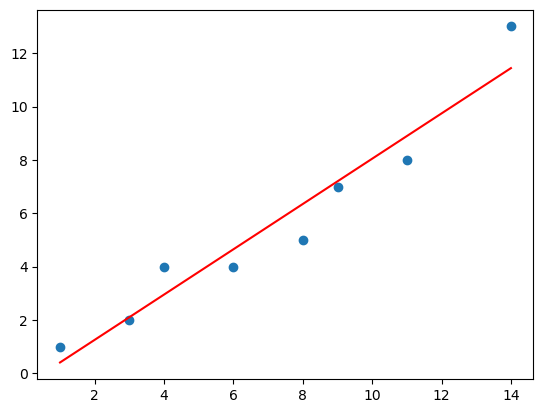

In [39]:
# Your code here.
x = party[['X']]
y = party['Y']
model = linear_model.LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0]*x
f,ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x, regression_line, c='r')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [41]:
# Your response here. 
print(result.coef_)
print(result.intercept_)
print(result.score(x,y))

"""
There seems to be a linear relationship between the two.
"""

[0.84848485]
-0.43939393939393767
0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [52]:
# Your response here. 
party = party.drop([7])

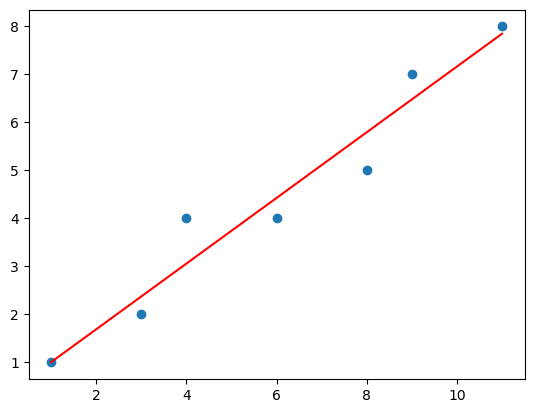

[0.68421053]
0.32330827067669166
0.9433811802232854


In [53]:
x = party[['X']]
y = party['Y']
model = linear_model.LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0]*x
f,ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x, regression_line, c='r')
plt.show()
print(result.coef_)
print(result.intercept_)
print(result.score(x,y))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
"""
Eliminating the outlier, made the regression model to be a better fit for the data we have, and it also
helped to increase the R^2 of the model.
"""